In [ ]:
import numpy as np
from PIL import Image

# Raport Lab 3 (18.10.2024)
Wykonany przez: Filip Połom



### Zad 1

In [ ]:
def rysuj_ramki_szare(w, h, grub, zmiana_koloru):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    min_dimension = min(w, h)
    liczba_paskow = min_dimension // (2 * grub) + 1
    for i in range(liczba_paskow):
        start = i * grub
        end_w = w - start
        end_h = h - start
        tab[start:end_h, start:end_w] = (i * zmiana_koloru) % 256
    return Image.fromarray(tab)

def rysuj_pasy_pionowe_szare(w, h, grub, zmiana_koloru):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    ile = w // grub
    for k in range(ile):
        for g in range(grub):
            j = k * grub + g
            for i in range(h):
                tab[i, j] = (k + zmiana_koloru) % 256
    return Image.fromarray(tab)

rysunek1 = rysuj_ramki_szare(300, 200, 5, 10)
rysunek2 = rysuj_pasy_pionowe_szare(300, 200, 5, 10)

![rysunek1](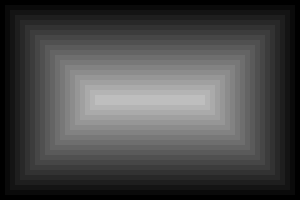 "rysuj ramki szare")

4 parametr określa o jaki odcień zmienia się każda kolejna ramka

![rysunek2](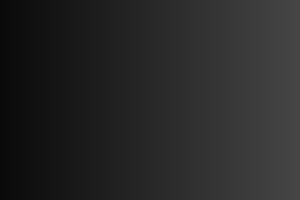 "pasy pionowe szare")

4 parametr określa o jaki odcień zmienia się każdy kolejny pasek od lewej do prawej


### Zad 2

In [ ]:
def negatyw(obraz: Image) -> Image:
    tab = np.asarray(obraz)
    tab_neg = tab.copy()
    match obraz.mode:
        case 'L':
            h, w = tab.shape
            for i in range(h):
                for j in range(w):
                    tab_neg[i, j] = 255 - tab[i, j]
        case '1':
            h, w = tab.shape
            for i in range(h):
                for j in range(w):
                    tab_neg[i, j] = 1 - tab_neg[i, j]
        case 'RGB':
            h, w, b = tab.shape
            for i in range(h):
                for j in range(w):
                    for k in range(b):
                        tab_neg[i, j, k] = 255 - tab_neg[i, j, k]
        case 'RGBA':
            h, w, b = tab.shape
            for i in range(h):
                for j in range(w):
                    tab_neg[i, j] = tuple(255 - tab_neg[i, j, k] if k < 3 else tab_neg[i, j, k] for k in range(4))
        case _:
            raise TypeError("Nie obsługiwany format obrazu")
    return Image.fromarray(tab_neg)

| `   nr    ` |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Oryginal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Negatyw                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|:-----------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|      1      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   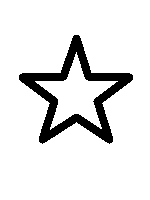                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     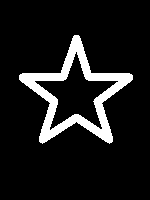                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|      2      | 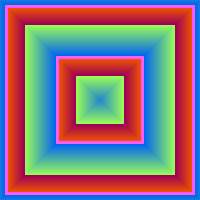 | 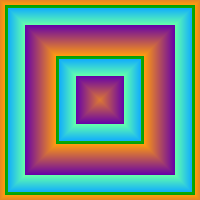 |
|      3      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             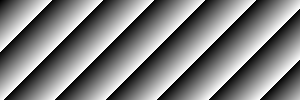                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             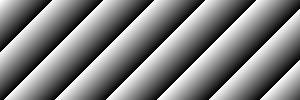                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |

### Zad3

In [ ]:
def koloruj_w_paski(obraz, grub, kolor, zmiana_koloru):
    t_obraz = np.asarray(obraz)
    h, w = t_obraz.shape
    t = (h, w, 3)
    tab = np.ones(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if not t_obraz[i, j]:
                tab[i, j] = tuple((kolor[k] + zmiana_koloru * (i // grub)) % 256 for k in range(3))
            else:
                tab[i, j] = [255, 255, 255]
    return Image.fromarray(tab)

* kolor (w formacie [r, g, b]) - od jakiego koloru ma zacząć paski
* zmiana_koloru (liczba 0-255) - o jaką wartość ma zmienić kolor paska

|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   oryginal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |                                                                                                                                                                                                                png                                                                                                                                                                                                                 |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       jpg                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| 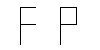 | 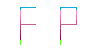 | 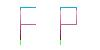 |

Otrzymane obrazy są różne, gdyż format JPEG jest stratny, czyli przy zapisie niektóre dane obrazu są trwale kasowane.

Objawia się to artefaktami na wynikowej grafice.

PNG w przeciwieństwie do JPEG jest bezstratny, co oznacza zapis bez utraty danych o zdjęciu. Obsługuje również kanał alfa, czyli przezroczystość.

### Zad 4

In [ ]:
tab_uint8 = np.arange(2, dtype='uint8')
print(f"tab_uint8 dtype: {tab_uint8.dtype}")
# tab_uint8[0] = 328
# OverflowError: Python integer 328 out of bounds for uint8
# tab_uint8[1] = -24
# OverflowError: Python integer -24 out of bounds for uint8

Jeśli elementy tablicy są typu `uint8`, to próba wpisania elementu spoza zakresu kończy się błędem OverflowError.

In [ ]:
tab_int16 = np.arange(2, dtype='int16')
print(f"tab_int16 dtype: {tab_int16.dtype}")
tab_int16[0] = 324
tab_int16[1] = -24
print(f"tab_int16 values: {[tab_int16[i] for i in range(tab_int16.size)]}") # 324, -24
tab_uint8 = tab_int16.copy().astype('uint8') # konwersja tablicy int16 na typ uint8 
print(f"tab_uint8 dtype: {tab_uint8.dtype}")
print(f"tab_uint8 values: {[tab_uint8[i] for i in range(tab_uint8.size)]}") # 68, 232

Przy konwersji tablicy z elementami `int16` na tablie elementów `uint8` następuje integer overflow (wraparound), co sprawia, że liczba zawija się na początek/koniec zakresu.

Zakres `uint8` = [0,255]

Gdy wartość przekroczy 255, to wynik jest zawijany do 0, a gdy liczba jest mniejsza od zera to jest zawijana do 255.

324 (`int16`) -> 324 - 256 = 68 (`uint8`)

-24 (`int16`) -> 256 - 24 = 232 (`uint8`)